In [1]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2) # creamos 100 puntos 
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] # Distribuimos los 100 puntos en 2 clusters (alrededor de 2 y -2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2)) # Creamos outliers random entre -4 y 4
X = np.r_[X_inliers, X_outliers] # Concatenamos en x que es una matriz de datos (x y y)

# definimos ground_truth para calcular el # errores
n_outliers = len(X_outliers) 
ground_truth = np.ones(len(X), dtype=int) # marcamos con 1 los datos 
ground_truth[-n_outliers:] = -1 #marcamos con un -1 los 20 outliers definidos

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum() #Comparamos el número de outliers calculados con los 20 outliers que sabemos que hay
X_scores = clf.negative_outlier_factor_  # puntaje de outlier (radio de circulo)


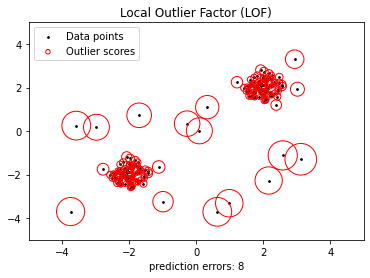

In [2]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()